下载数据集

In [2]:
%matplotlib inline
import os 
import pandas as pd 
import torch 
import torchvision
from d2l import torch as d2l 

d2l.DATA_HUB['banana-detection'] = (d2l.DATA_URL + 'banana-detection.zip',
                                    '5de26c8fce5ccdea9f91267273464dc968d20d72')

In [3]:
def read_data_bananas(is_train=True):
    """读取香蕉检测数据集中的图像和标签"""
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir, 'bananas_train' if is_train else 'bananas_val', 'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name') # 用img_name作为索引
    images, targets = [], []
    for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if is_train else 'bananas_val', 'images', f'{img_name}')))
        # 这里的target包含(类别，左上角x，左上角y, 右下角x， 右下角y)
        # 其中所有图像都具有相同的香蕉类别(索引为0)
        targets.append(list(target))
    return images, torch.tensor(targets).unsqueeze(1) / 256 

In [4]:
class BananasDataset(torch.utils.data.Dataset):
    """用于加载香蕉检测数据集的自定义数据集"""
    def __init__(self, is_train):
        self.features, self.labels = read_data_bananas(is_train)
        print('read' + str(len(self.features)) + (f' training examples' if is_train else f' validation examples'))
    
    def __getitem__(self, idx):
        return (self.features[idx].float(), self.labels[idx])
    
    def __len__(self):
        return len(self.features)

In [5]:
def load_data_bananas(batch_size):
    """加载香蕉检测数据集"""
    # 训练集按随机顺序读取
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True), batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False), batch_size)

    return train_iter, val_iter

In [ ]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
# 图像(批量大小，通道数，高度，宽度)，标签(批量大小，边界框可能出现的最大数，5)
batch[0].shape, batch[1].shape

read1000 training examples
read100 validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

演示

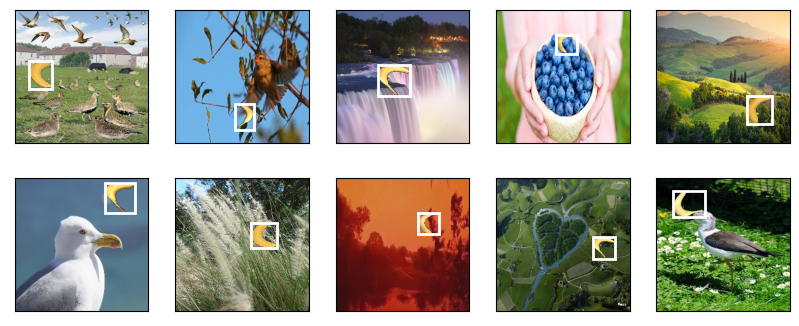

In [ ]:
imgs = (batch[0][0:10].permute(0, 2, 3, 1)) / 255
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])  # 显示出框